In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [335]:
# checks if file exists

os.path.exists('airline_accidents.csv.zip')

True

In [336]:
# read the csv file as panda dataframe

df=pd.read_csv('airline_accidents.csv.zip',low_memory=False)
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,...,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,...,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,


In [337]:
df.columns.tolist()

['Event Id',
 'Investigation Type',
 'Accident Number',
 'Event Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport Code',
 'Airport Name',
 'Injury Severity',
 'Aircraft Damage',
 'Aircraft Category',
 'Registration Number',
 'Make',
 'Model',
 'Amateur Built',
 'Number of Engines',
 'Engine Type',
 'FAR Description',
 'Schedule',
 'Purpose of Flight',
 'Air Carrier',
 'Total Fatal Injuries',
 'Total Serious Injuries',
 'Total Minor Injuries',
 'Total Uninjured',
 'Weather Condition',
 'Broad Phase of Flight',
 'Report Publication Date',
 'Unnamed: 30']

In [338]:
# filter the necessary columns

relevant_columns=['Event Date','Injury Severity','Aircraft Damage','Aircraft Category','Make','Model','Number of Engines','Engine Type','Total Fatal Injuries','Total Serious Injuries','Total Uninjured','Weather Condition']

In [339]:
# replace dataframe with relevant columns

df.replace("-", np.nan, inplace=True)
df = df[relevant_columns]
df.head()

,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
0,12/31/2007,Non-Fatal,Substantial,Airplane,Piper,PA-12,1,Reciprocating,,,2,VMC
1,12/31/2007,Non-Fatal,Minor,,Cessna,T303,,,,,1,
2,12/30/2007,Non-Fatal,Substantial,Airplane,Lerohl,RV-8,1,Reciprocating,,,1,VMC
3,12/30/2007,Fatal(1),Substantial,Airplane,Cirrus Design Corp.,SR22,1,Reciprocating,1,,,VMC
4,12/30/2007,Fatal(3),Substantial,Helicopter,BELL,206L-3,1,Turbo Shaft,3,0,0,VMC


In [340]:
# checks aircraft categories

df['Aircraft Category'].value_counts()

Aircraft Category
                 143206
Airplane           6732
Helicopter          760
Glider              141
Balloon              70
Gyrocraft            36
Ultralight            7
Powered-Lift          3
Blimp                 3
Unknown               1
Name: count, dtype: int64

In [341]:
# filters only airplanes 

df=df[df['Aircraft Category'].str.strip()=='Airplane']
df

,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
0,12/31/2007,Non-Fatal,Substantial,Airplane,Piper,PA-12,1,Reciprocating,,,2,VMC
2,12/30/2007,Non-Fatal,Substantial,Airplane,Lerohl,RV-8,1,Reciprocating,,,1,VMC
3,12/30/2007,Fatal(1),Substantial,Airplane,Cirrus Design Corp.,SR22,1,Reciprocating,1,,,VMC
5,12/29/2007,Non-Fatal,Substantial,Airplane,Piper,PA-46-310P,1,Reciprocating,,,5,VMC
6,12/29/2007,Non-Fatal,Substantial,Airplane,Ercoupe (Eng & Research Corp.),415D,1,Reciprocating,,,2,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
63898,01/02/1982,Non-Fatal,Substantial,Airplane,CESSNA,150L,1,Reciprocating,0,0,2,VMC
63899,01/02/1982,Fatal(3),Destroyed,Airplane,CESSNA,180,1,Reciprocating,3,0,0,VMC
63901,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,401B,2,Reciprocating,0,0,2,IMC
63902,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,140,1,Reciprocating,0,0,2,VMC


In [342]:
# checks the engine type

df['Engine Type'].value_counts().index.tolist()

[' Reciprocating ',
 ' Turbo Prop ',
 '  ',
 ' Turbo Fan ',
 ' Unknown ',
 ' Turbo Jet ',
 ' Turbo Shaft ',
 ' REC, TJ, TJ ']

In [343]:
# filters only engine type of relevant planes

df=df[df['Engine Type'].str.strip().isin(['Reciprocating','Turbo Fan','Turbo Jet','Turbo Prop'])]
df


,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
0,12/31/2007,Non-Fatal,Substantial,Airplane,Piper,PA-12,1,Reciprocating,,,2,VMC
2,12/30/2007,Non-Fatal,Substantial,Airplane,Lerohl,RV-8,1,Reciprocating,,,1,VMC
3,12/30/2007,Fatal(1),Substantial,Airplane,Cirrus Design Corp.,SR22,1,Reciprocating,1,,,VMC
5,12/29/2007,Non-Fatal,Substantial,Airplane,Piper,PA-46-310P,1,Reciprocating,,,5,VMC
6,12/29/2007,Non-Fatal,Substantial,Airplane,Ercoupe (Eng & Research Corp.),415D,1,Reciprocating,,,2,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
63898,01/02/1982,Non-Fatal,Substantial,Airplane,CESSNA,150L,1,Reciprocating,0,0,2,VMC
63899,01/02/1982,Fatal(3),Destroyed,Airplane,CESSNA,180,1,Reciprocating,3,0,0,VMC
63901,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,401B,2,Reciprocating,0,0,2,IMC
63902,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,140,1,Reciprocating,0,0,2,VMC


In [344]:
df.columns

Index(['Event Date', 'Injury Severity', 'Aircraft Damage', 'Aircraft Category',
       'Make', 'Model', 'Number of Engines', 'Engine Type',
       'Total Fatal Injuries', 'Total Serious Injuries', 'Total Uninjured',
       'Weather Condition'],
      dtype='object')

In [345]:
# checks aircraft models and filter models with more than one aircraft

top_models=df['Model'].value_counts()
print(top_models)
top_5_models=df['Model'].value_counts().head(5).index.tolist()
print(top_5_models)
top_5_count=df['Model'].value_counts().head(5).values.tolist()
print(top_5_count)

Model
152                 212
172                 149
172N                140
PA-28-140           102
150                  96
                   ... 
D-95A                 1
YMF                   1
LCA                   1
KitFox Series 5       1
DC9                   1
Name: count, Length: 1724, dtype: int64
[' 152 ', ' 172 ', ' 172N ', ' PA-28-140 ', ' 150 ']
[212, 149, 140, 102, 96]


In [346]:
len(df['Model'].value_counts())

1724

Text(0, 0.5, 'Number Of Accidents By Model')

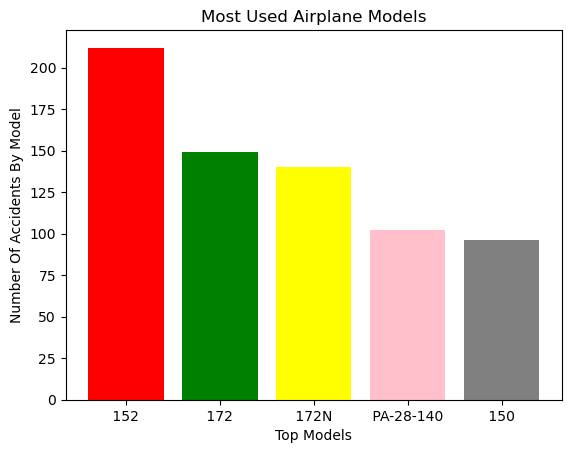

In [347]:
# plot a bar graph of top models against number of accidents

x=top_5_models
y=top_5_count
colour=['red','green','yellow','pink','grey']
plt.bar(x,y,color=colour)
plt.title('Most Used Airplane Models')
plt.xlabel('Top Models')
plt.ylabel('Number Of Accidents By Model')

In [348]:

df['Aircraft Damage'].value_counts()

Aircraft Damage
Substantial     4977
Destroyed       1181
Minor            169
                  98
Name: count, dtype: int64

In [349]:
df['Number of Engines'].value_counts()

Number of Engines
1     5526
2      824
3       32
4       24
        19
Name: count, dtype: int64

In [350]:
df_grouped=df.groupby('Aircraft Damage')['Injury Severity'].count().reset_index()
df_grouped

,Aircraft Damage,Injury Severity
0,,98
1,Destroyed,1181
2,Minor,169
3,Substantial,4977


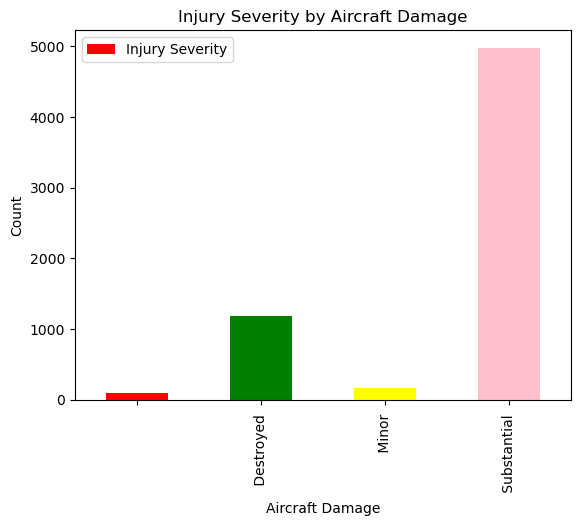

In [351]:
colour=['red','green','yellow','pink',]
df_grouped.plot(kind='bar',x='Aircraft Damage',y='Injury Severity',color=colour,title='Injury Severity by Aircraft Damage',)
plt.ylabel('Count')
plt.show()

In [352]:
df

,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
0,12/31/2007,Non-Fatal,Substantial,Airplane,Piper,PA-12,1,Reciprocating,,,2,VMC
2,12/30/2007,Non-Fatal,Substantial,Airplane,Lerohl,RV-8,1,Reciprocating,,,1,VMC
3,12/30/2007,Fatal(1),Substantial,Airplane,Cirrus Design Corp.,SR22,1,Reciprocating,1,,,VMC
5,12/29/2007,Non-Fatal,Substantial,Airplane,Piper,PA-46-310P,1,Reciprocating,,,5,VMC
6,12/29/2007,Non-Fatal,Substantial,Airplane,Ercoupe (Eng & Research Corp.),415D,1,Reciprocating,,,2,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
63898,01/02/1982,Non-Fatal,Substantial,Airplane,CESSNA,150L,1,Reciprocating,0,0,2,VMC
63899,01/02/1982,Fatal(3),Destroyed,Airplane,CESSNA,180,1,Reciprocating,3,0,0,VMC
63901,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,401B,2,Reciprocating,0,0,2,IMC
63902,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,140,1,Reciprocating,0,0,2,VMC


In [353]:
# removes all fatal injuries

df=df[df['Injury Severity'].str.strip()=='Non-Fatal']
df

,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
0,12/31/2007,Non-Fatal,Substantial,Airplane,Piper,PA-12,1,Reciprocating,,,2,VMC
2,12/30/2007,Non-Fatal,Substantial,Airplane,Lerohl,RV-8,1,Reciprocating,,,1,VMC
5,12/29/2007,Non-Fatal,Substantial,Airplane,Piper,PA-46-310P,1,Reciprocating,,,5,VMC
6,12/29/2007,Non-Fatal,Substantial,Airplane,Ercoupe (Eng & Research Corp.),415D,1,Reciprocating,,,2,VMC
7,12/29/2007,Non-Fatal,Substantial,Airplane,Cessna,172F,1,Reciprocating,,,1,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
63894,01/02/1982,Non-Fatal,Destroyed,Airplane,BELLANCA,17-30A,1,Reciprocating,0,0,0,IMC
63898,01/02/1982,Non-Fatal,Substantial,Airplane,CESSNA,150L,1,Reciprocating,0,0,2,VMC
63901,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,401B,2,Reciprocating,0,0,2,IMC
63902,01/01/1982,Non-Fatal,Substantial,Airplane,CESSNA,140,1,Reciprocating,0,0,2,VMC


In [356]:
# which models have the least accidents

df['Model'].value_counts().sort_values(ascending=True).head(10).index.tolist()

[' T337H ',
 ' Samson ',
 ' Husky A1-B ',
 ' M-18L ',
 ' C340A ',
 ' MA-5 Charger ',
 ' A-22 ',
 ' 737-7H4 ',
 ' PA 32R 301T ',
 ' Thorp T18 ']